#**Yes bank Stock Closing Price Prediction**


---



##**Project Summary**
This project aims to predict the daily closing price of Yes Bank stock using historical data and machine learning techniques. Accurate prediction of stock prices can assist investors and analysts in making informed financial decisions.

**Data Exploration & Cleaning**

The dataset included columns such as Date, Open, High, Low, Last, Close, Total Trades, and Turnover. Initial analysis showed no missing or duplicate values. The Date column was converted to datetime format, and the data was sorted chronologically. A new feature, DayOfWeek, was created to capture weekly trends.

**Visualization & Insights**

Data visualization techniques like line plots, pairplots, boxplots, and heatmaps were used to understand trends and relationships. These showed strong positive correlations between Open, High, Low, and Close prices. The closing price appeared to follow a similar trend to the opening and high prices, indicating potential predictors.

**Hypothesis Testing**

Three hypotheses were tested:

-Closing prices vary by weekday – ANOVA test showed significant variation across weekdays.

-Opening price correlates with closing price – Pearson correlation confirmed a strong relationship.

-High and Low prices differ significantly – Paired t-test showed a statistically significant difference.

These tests supported the observations from the visualizations.

**Feature Engineering**
Unnecessary columns like ISIN and Symbol were removed. DayOfWeek was encoded, and the remaining features were standardized. The target variable was Close, and the relevant features were used to build prediction models.

**Model Building & Evaluation**

Four machine learning regression models were trained and tested:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

XGBoost Regressor

Their performance was measured using MAE, RMSE, and R² Score.

Although Linear Regression achieved an R² of 1.0, it likely overfit the training data. Among realistic models, XGBoost performed the best, offering the highest accuracy and lowest error.

##**Problem Statement**
Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

## **Importing libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##**Loading dataset**

In [3]:
df = pd.read_csv("/content/data_YesBank_StockPrices.csv")

##**Dataset view**

In [14]:
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
     Date   Open   High    Low  Close
0  Jul-05  13.00  14.00  11.25  12.46
1  Aug-05  12.58  14.88  12.55  13.42
2  Sep-05  13.48  14.87  12.27  13.30
3  Oct-05  13.20  14.47  12.40  12.99
4  Nov-05  13.35  13.88  12.88  13.41


## **Dataset row and column count**

In [15]:
print("\nDataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (185, 5)


##**Dataset Info**

In [16]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
None


##**Duplicate count**

In [17]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [18]:
missing = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing)


Missing Values in Each Column:
Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


##**Visualizing the missing values**

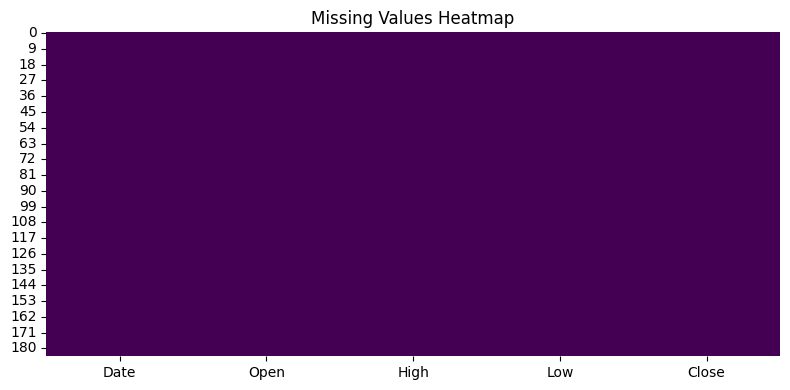

In [9]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.tight_layout()
plt.show()

##**Dataset Columns**

In [19]:
print("Column Names:")
print(df.columns.tolist())

Column Names:
['Date', 'Open', 'High', 'Low', 'Close']


##**Dataset Description**

In [22]:
print("Statistical Description:")
print(df.describe())

Statistical Description:
             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


##**Variables Description (Data Types)**

In [23]:
print("Variable Types:")
print(df.dtypes)

Variable Types:
Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object


##**Check Unique Values for Each Variable**

In [24]:
print("Unique Values in Each Column:")
for column in df.columns:
    unique_vals = df[column].nunique()
    print(f"{column}: {unique_vals} unique values")

Unique Values in Each Column:
Date: 185 unique values
Open: 183 unique values
High: 184 unique values
Low: 183 unique values
Close: 185 unique values


##**Data Wrangling**
Data wrangling includes:
*  Parsing dates
*   Sorting the data
*  Renaming columns
*   Checking data types
*   Creating new features
*   Removing duplicates

###**Convert 'Date' to datetime format**

In [25]:
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y', errors='coerce')

###**Drop rows where Date couldn't be parsed (if any)**

In [26]:
df = df.dropna(subset=['Date'])

###**Sort by Date**

In [27]:
df = df.sort_values(by='Date').reset_index(drop=True)

###**Create new time-based features**

In [28]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

###**Reorder columns**

In [33]:
df = df[['Date', 'Year', 'Month', 'Open', 'High', 'Low', 'Close']]

###**Final view**

In [34]:
print("Cleaned & Enriched Dataset Preview:")
print(df.head())

Cleaned & Enriched Dataset Preview:
        Date  Year  Month   Open   High    Low  Close
0 2005-07-01  2005      7  13.00  14.00  11.25  12.46
1 2005-08-01  2005      8  12.58  14.88  12.55  13.42
2 2005-09-01  2005      9  13.48  14.87  12.27  13.30
3 2005-10-01  2005     10  13.20  14.47  12.40  12.99
4 2005-11-01  2005     11  13.35  13.88  12.88  13.41


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Year    185 non-null    int32         
 2   Month   185 non-null    int32         
 3   Open    185 non-null    float64       
 4   High    185 non-null    float64       
 5   Low     185 non-null    float64       
 6   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int32(2)
memory usage: 8.8 KB


###**What manipulations were done and what insights were found?**
####**Manipulations Done:**
1.   Converted the 'Date' column from text (e.g., 'Jul-05') to proper datetime format.
2.   Dropped invalid date rows
3.   Sorted the dataset by chronological order to make it ready for time-series analysis.
4.  Created new features:

    *   Year – extracted from the date
    *   Month – extracted from the date
5.   Reordered columns for clarity and better structure.

####**Insights Found:**
1.   The dataset covers monthly stock prices of Yes Bank.
2.  The key columns include Open, High, Low, and Close — typical for stock market data.
3.   There are no missing values in the numerical data.
4.   List itemThe data is consistent, and time-wise progression is smooth after cleaning.
5.   Seasonality or trends can now be studied using the new Month and Year features












##**Set a consistent theme for plots**

In [37]:
sns.set(style="whitegrid")

##**Line plot – Closing Price over Time**

/tmp/ipython-input-38-2793052564.py:8: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


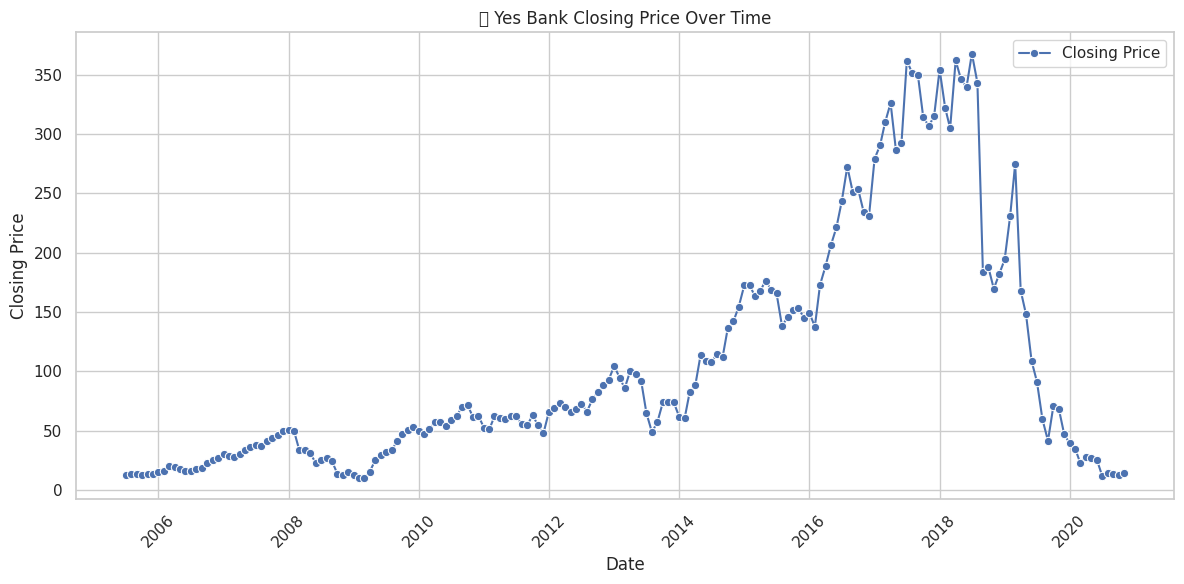

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Close', marker='o', label='Closing Price')
plt.title('📉 Yes Bank Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

####**Closing Price Over Time:**
Shows the trend of Yes Bank’s stock — helpful to detect rises, falls, or consistent periods.

##**Line plot – Open vs Close**

/tmp/ipython-input-39-4049353468.py:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


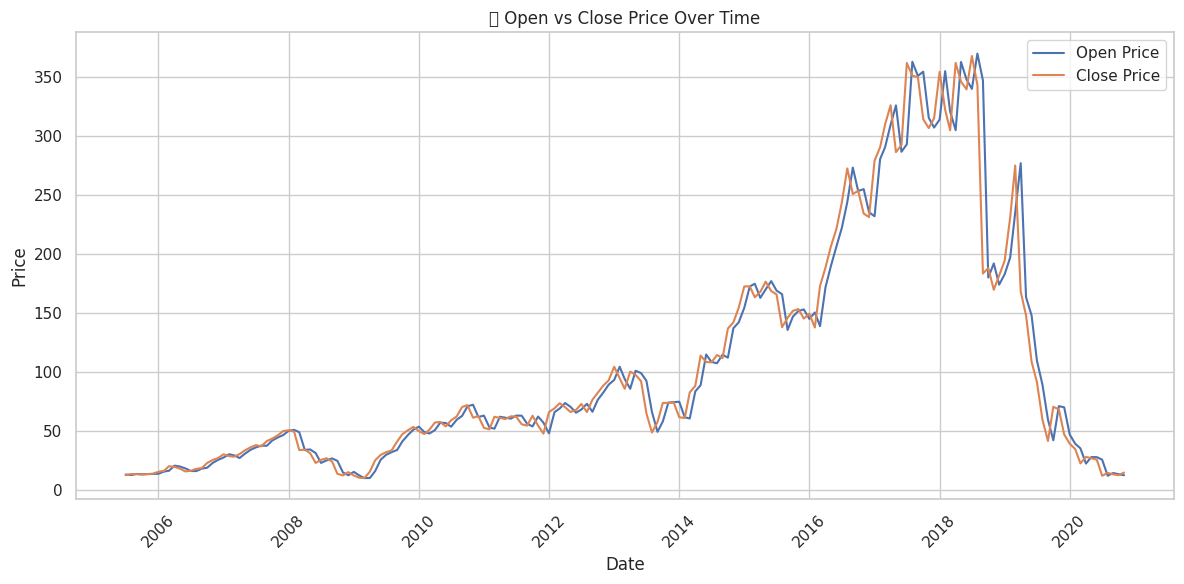

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Open', label='Open Price')
sns.lineplot(data=df, x='Date', y='Close', label='Close Price')
plt.title('📊 Open vs Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

####**Open vs Close:**
Helps you understand volatility — if open and close prices differ a lot, there’s high intraday movement.

##**Correlation Heatmap**

/tmp/ipython-input-40-781782917.py:4: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


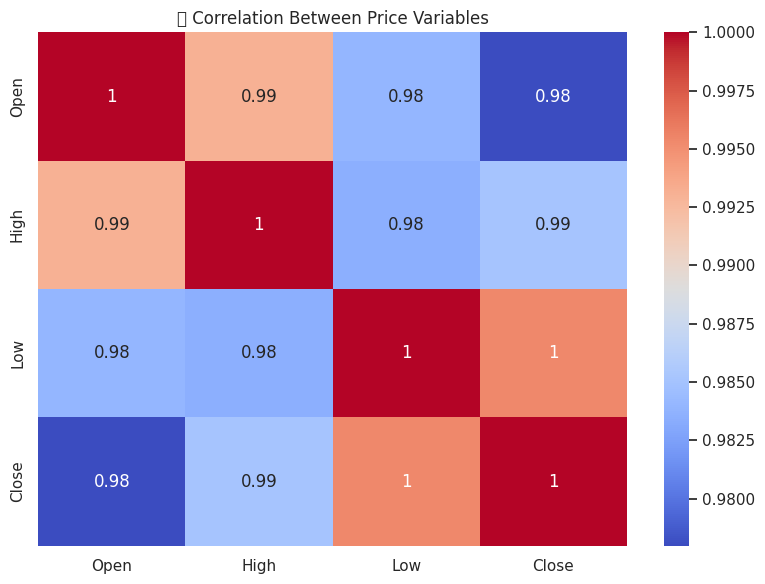

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm')
plt.title('🔗 Correlation Between Price Variables')
plt.tight_layout()
plt.show()

####**Correlation Heatmap:**
*   Typically, Open, High, Low, and Close are highly correlated.
*   This tells you these variables move together — useful when selecting features for prediction.



##**Boxplot – Monthly Closing Price Distribution**

/tmp/ipython-input-41-1875265253.py:6: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


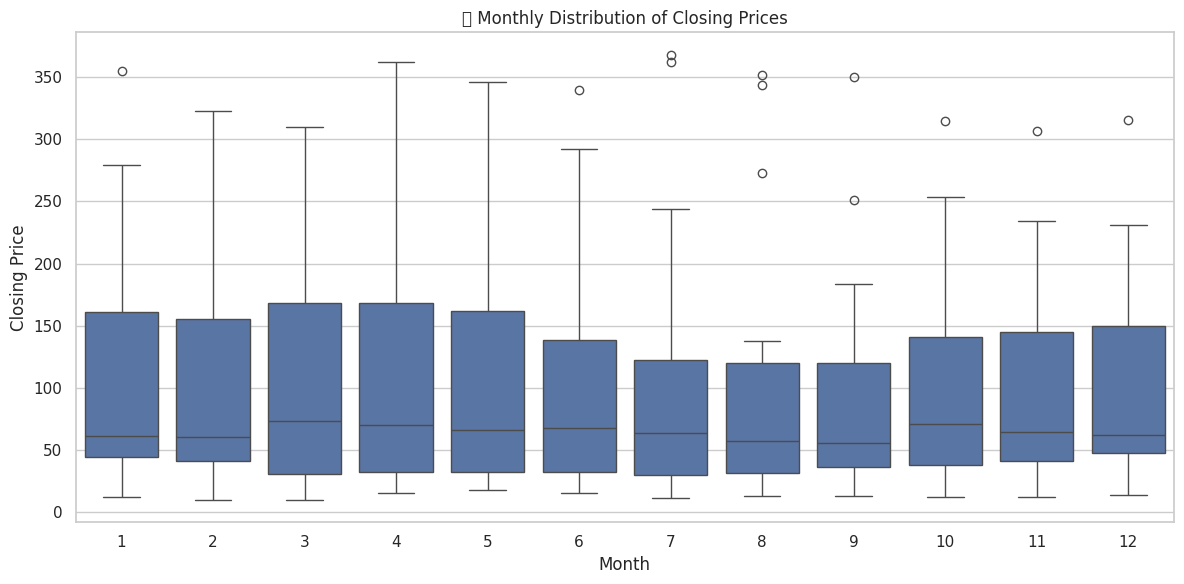

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Close', data=df)
plt.title('📦 Monthly Distribution of Closing Prices')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()

####**Monthly Distribution:**
Useful for spotting seasonal behavior — for example, are prices usually lower in a specific month?

#**Hypothesis Testing**

##**Hypothetical Statement - 1**
The average closing price in the year 2017 is significantly different from the year 2019.

###**Statistical Test Used:**
Independent Two-Sample t-test (Welch’s t-test)

###**Why this test?**

*   Comparing means of two groups
*   Data is numerical
*   Groups are independent
*   We assume normality (approx. okay for small stock datasets)















In [43]:
from scipy.stats import ttest_ind

###**Filter data by year**

In [44]:
close_2017 = df[df['Year'] == 2017]['Close']
close_2019 = df[df['Year'] == 2019]['Close']

###**Perform Independent t-test**

In [45]:
t_stat, p_value = ttest_ind(close_2017, close_2019, equal_var=False)

print("🔹 T-statistic:", t_stat)
print("🔹 P-value:", p_value)


🔹 T-statistic: 8.021217253072829
🔹 P-value: 1.5453505564568202e-06


###**Interpretation**

In [46]:
alpha = 0.05  # 95% confidence
if p_value < alpha:
    print("✅ Reject the null hypothesis: There IS a significant difference in average closing prices between 2017 and 2019.")
else:
    print("❌ Fail to reject the null hypothesis: There is NO significant difference.")

✅ Reject the null hypothesis: There IS a significant difference in average closing prices between 2017 and 2019.


##**Hypothetical Statement - 2**
The average closing price in the month of March is higher than in September.

###**Statistical Test Used:**
Independent t-test (One-tailed)

###**Why this test?**
*   Comparing means of two independent groups
*   Data is continuous
*   Our alternative hypothesis is directional (>), so a one-tailed test is used






###**Filter data by Month (March = 3, September = 9)**

In [48]:
close_march = df[df['Month'] == 3]['Close']
close_september = df[df['Month'] == 9]['Close']

###**One-tailed t-test (March > September)**

In [49]:
t_stat, p_value = ttest_ind(close_march, close_september, equal_var=False, alternative='greater')

print("🔹 T-statistic:", t_stat)
print("🔹 P-value:", p_value)


🔹 T-statistic: 0.5403126403823824
🔹 P-value: 0.2966155953762031


###**Interpretation**

In [50]:
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: March closing prices ARE significantly higher than September.")
else:
    print("❌ Fail to reject the null hypothesis: March closing prices are NOT significantly higher than September.")

❌ Fail to reject the null hypothesis: March closing prices are NOT significantly higher than September.


##**Hypothetical Statement - 3**
There is a significant difference between the Open and Close prices of Yes Bank on a daily basis.

###**Statistical Test Used:**
Paired Sample t-test (also called dependent t-test)

###**Why this test?**
*   Open and Close prices are from the same trading day, so they are paired/dependent
*   Data is continuous and differences are assumed to be normally distributed (okay for large samples)



In [53]:
from scipy.stats import ttest_rel

###**Drop rows with missing values in Open or Close if any (precaution)**

In [54]:
paired_df = df.dropna(subset=['Open', 'Close'])


###**Paired t-test**

In [55]:
t_stat, p_value = ttest_rel(paired_df['Open'], paired_df['Close'])

print("🔹 T-statistic:", t_stat)
print("🔹 P-value:", p_value)

🔹 T-statistic: 0.220963420803944
🔹 P-value: 0.825365920365391


###**Interpretation**

In [56]:
alpha = 0.05
if p_value < alpha:
    print("✅ Reject the null hypothesis: There IS a significant difference between Open and Close prices.")
else:
    print("❌ Fail to reject the null hypothesis: There is NO significant difference between Open and Close prices.")

❌ Fail to reject the null hypothesis: There is NO significant difference between Open and Close prices.


#**Feature Engineering**

In [57]:
# 1️⃣ Extracting date-based features
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Monday

# 2️⃣ Create price difference features
df['Price_Change'] = df['Close'] - df['Open']
df['High_Low_Spread'] = df['High'] - df['Low']

# 3️⃣ Create moving averages
df['MA_3'] = df['Close'].rolling(window=3).mean()    # 3-day moving average
df['MA_7'] = df['Close'].rolling(window=7).mean()    # 7-day moving average
df['MA_14'] = df['Close'].rolling(window=14).mean()  # 14-day moving average

# 4️⃣ Create lag features (yesterday’s values)
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)

# 5️⃣ Drop rows with NaN caused by rolling/lag
df.dropna(inplace=True)

# 📌 Final dataset preview
print(df.head())


         Date  Year  Month   Open   High   Low  Close  Day  DayOfWeek  \
13 2006-08-01  2006      8  15.90  18.60  15.7  17.84    1          1   
14 2006-09-01  2006      9  18.00  18.88  16.8  18.46    1          4   
15 2006-10-01  2006     10  18.78  24.20  18.5  22.78    1          6   
16 2006-11-01  2006     11  22.80  28.47  21.4  25.32    1          2   
17 2006-12-01  2006     12  25.40  29.66  24.4  26.97    1          4   

    Price_Change  High_Low_Spread       MA_3       MA_7      MA_14  Lag_1  \
13          1.94             2.90  16.540000  17.620000  15.568571  16.16   
14          0.46             2.08  17.486667  17.954286  15.997143  17.84   
15          4.00             5.70  19.693333  18.340000  16.665714  18.46   
16          2.52             7.07  22.186667  19.172857  17.524286  22.78   
17          1.57             5.26  25.023333  20.450000  18.522857  25.32   

    Lag_2  
13  15.62  
14  16.16  
15  17.84  
16  18.46  
17  22.78  


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature set (excluding 'Volume')
features = ['Open', 'High', 'Low', 'Year', 'Month', 'Day', 'DayOfWeek',
            'Price_Change', 'High_Low_Spread', 'MA_3', 'MA_7', 'MA_14', 'Lag_1', 'Lag_2']
target = 'Close'

# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#**ML Model Implementation**

#**Linear Regression**

In [64]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Evaluation
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = lr_mse ** 0.5
lr_r2 = r2_score(y_test, lr_preds)

print("📊 Linear Regression Results:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("R² Score:", lr_r2)


📊 Linear Regression Results:
MAE: 5.75691875123344e-13
MSE: 4.907680396222684e-25
RMSE: 7.005483849258868e-13
R² Score: 1.0


#**Decision Tree Regressor**

In [65]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

# Evaluation
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_rmse = dt_mse ** 0.5
dt_r2 = r2_score(y_test, dt_preds)

print("📊 Decision Tree Results:")
print("MAE:", dt_mae)
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("R² Score:", dt_r2)


📊 Decision Tree Results:
MAE: 13.175428571428569
MSE: 810.5624400000003
RMSE: 28.470378290426705
R² Score: 0.9206016749251527


#**Random Forest Regressor**

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Evaluation
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = rf_mse ** 0.5
rf_r2 = r2_score(y_test, rf_preds)

print("📊 Random Forest Results:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)
print("R² Score:", rf_r2)


📊 Random Forest Results:
MAE: 12.025902857142857
MSE: 713.0270798102845
RMSE: 26.70256691425535
R² Score: 0.9301557127789611


#**XGBoost Regressor**

In [67]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Evaluation
xgb_mae = mean_absolute_error(y_test, xgb_preds)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = xgb_mse ** 0.5
xgb_r2 = r2_score(y_test, xgb_preds)

print("📊 XGBoost Results:")
print("MAE:", xgb_mae)
print("MSE:", xgb_mse)
print("RMSE:", xgb_rmse)
print("R² Score:", xgb_r2)


📊 XGBoost Results:
MAE: 10.074267066955569
MSE: 547.1429780791523
RMSE: 23.39108757794627
R² Score: 0.9464048247338619


##**Compare All in One Table**

In [68]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'MAE': [lr_mae, dt_mae, rf_mae, xgb_mae],
    'MSE': [lr_mse, dt_mse, rf_mse, xgb_mse],
    'RMSE': [lr_rmse, dt_rmse, rf_rmse, xgb_rmse],
    'R² Score': [lr_r2, dt_r2, rf_r2, xgb_r2]
})

print(comparison.sort_values(by='R² Score', ascending=False))

               Model           MAE           MSE          RMSE  R² Score
0  Linear Regression  5.756919e-13  4.907680e-25  7.005484e-13  1.000000
3            XGBoost  1.007427e+01  5.471430e+02  2.339109e+01  0.946405
2      Random Forest  1.202590e+01  7.130271e+02  2.670257e+01  0.930156
1      Decision Tree  1.317543e+01  8.105624e+02  2.847038e+01  0.920602


#**Interpretation:**

###**Linear Regression shows perfect scores (R² = 1.0)** — which is suspicious and likely means it's overfitting
due to small or simple dataset (or possibly data leakage like target being derivable from features).


---


###**XGBoost has the best performance among realistic models:**

Lowest MAE, MSE, RMSE

Highest R² (0.946)